## Document Size Analysis

In [41]:
import sys
!{sys.executable} -m pip install bs4
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install matplotlib

In [42]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

In [43]:
def get_source(url):
     agent = {"User-Agent":"Mozilla/5.0"}
     source=requests.get(url, headers=agent).text
     return source

def get_len(elem):
    return len(str(elem))
    
def get_script_info(script):
    if (script.string):
        return str(script.string).lstrip()[0:40] 
    elif (script.attrs):
        return script.attrs
    return script.id

def get_scripts(soup):
    sizes = []
    scriptIds = []
    for num, script in enumerate(soup.find_all('script'), start=1):
        sizes.append(len(str(script)))
        scriptIds.append(get_script_info(script))
        print(len(str(script)), get_script_info(script))
    return sizes, scriptIds

In [44]:
url="https://www.mlsstore.com/columbus-crew-sc/t-25897955+z-9594207-1542318430"
soup=BeautifulSoup(get_source(url), 'html.parser')

docSize = get_len(soup)
headSize = get_len(soup.html.head)
bodySize = get_len(soup.html.body)
allScriptSizes = get_len(soup.find_all('script'))

print(docSize)
print('HeadSize -',headSize, str(soup.html.head).lstrip()[0:25])
print('BodySize -',bodySize, str(soup.html.body).lstrip()[0:25])

print('Scripts Total -', allScriptSizes, 'Details:')

# Prints all script tags in the doc, with size in bytes on the left, 
# first subset of characters or attributes in the script on the right
scriptSizes, scriptIds = get_scripts(soup)

491933
HeadSize - 10096 <head><link href="/conten
BodySize - 481795 <body class="no-spriteshe
Scripts Total - 314843 Details:
18 
18 
241 window.NODE_ENV = 'production';
      wi
2276 (function measureLoadTime (win) {
      
17 None
17 None
50 bazadebezolkohpepadr="1164170165"
97 {'type': 'text/javascript', 'src': 'https://www.mlsstore.com/akam/11/4563d0b1', 'defer': ''}
5328 window.__ESI__ = window.__ESI__ || {};
 
14368 window.__ESI__ = window.__ESI__ || {};
 
159833 var __platform_data__={"initialAppContex
81 {'src': '/static/i18n/3f77940bb6ef9bf70a384029aee81309/js/en-US.js'}
73 {'src': '/static/1.1.0-rc-20200928.27522/js/core-vendor.js'}
68 {'src': '/static/1.1.0-rc-20200928.27522/js/vendor.js'}
68 {'src': '/static/1.1.0-rc-20200928.27522/js/common.js'}
72 {'src': '/static/1.1.0-rc-20200928.27522/js/thirdparty.js'}
77 {'src': '/static/1.1.0-rc-20200928.27522/js/thirdparty-init.js'}
77 {'src': '/static/1.1.0-rc-20200928.27522/js/department_grid.js'}
75 {'src': '/static/1.1.0-rc-202

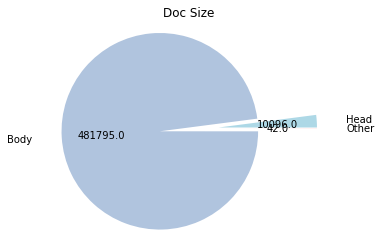

In [45]:
labels = ['Head', 'Body', 'Other']
other = docSize - (headSize + bodySize)
sizes = np.array([headSize, bodySize, other])

colors = ['lightblue','lightsteelblue','red']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=absolute_value, colors=colors, explode=(0.1, 0.5, 0.1), labeldistance=1.3)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Doc Size')
plt.show()

[18, 18, 241, 2276, 17, 17, 50, 97, 5328, 14368, 159833, 81, 73, 68, 68, 72, 77, 77, 75, 84, 131263, 79, 517]


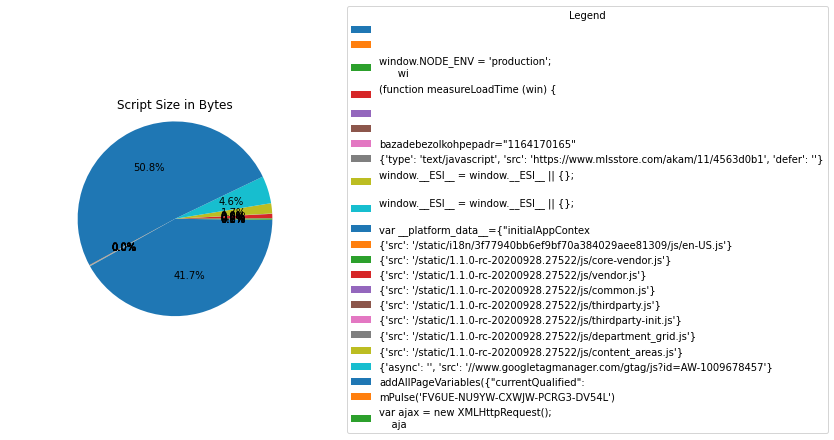

In [58]:
fig, ax = plt.subplots()
print(scriptSizes)
pie, text, autotexts = ax.pie(scriptSizes, autopct='%1.1f%%', labeldistance=1.3)

ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Script Size in Bytes', verticalalignment="top")
ax.legend(pie, scriptIds,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.7, 1))

plt.show()

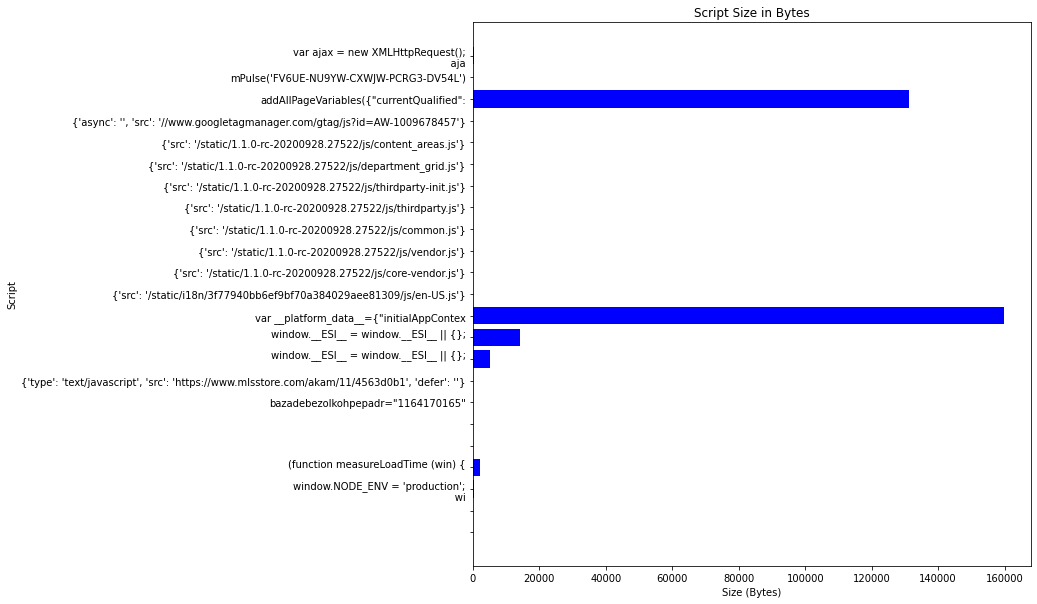

In [56]:
x_pos = [i for i, id in enumerate(scriptIds)]


plt.figure(figsize=(10, 10))
plt.barh(x_pos, scriptSizes, color='blue')
plt.ylabel("Script")
plt.xlabel("Size (Bytes)")
plt.title("Script Size in Bytes")

plt.yticks(x_pos, scriptIds)
plt.show()
